# Amazon Baby Products Sentiment Analysis


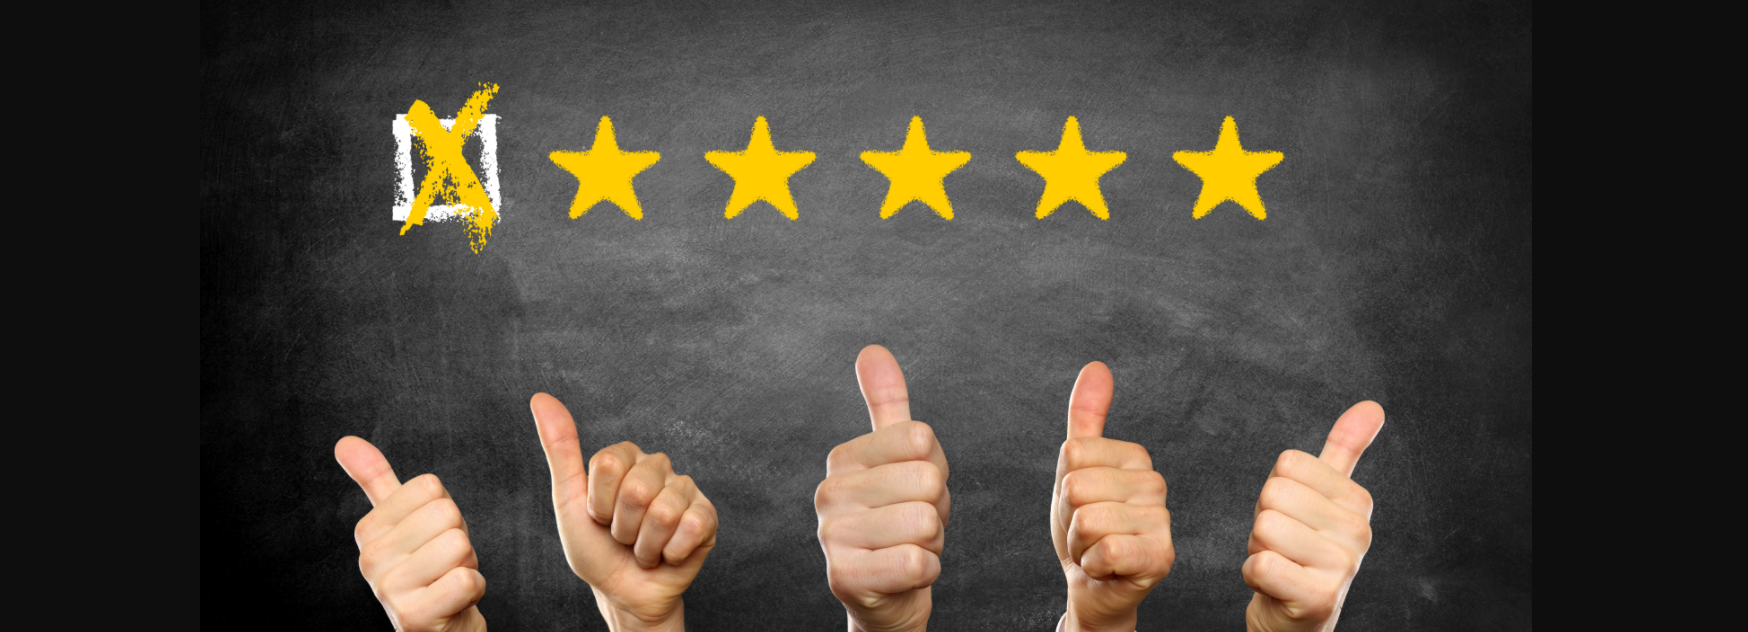

In [1]:
from IPython.display import Image
Image(filename ='C:/amazon logo.png')

               As per one survey, 72% of consumers will take action only after reading a positive review. 
###### As a frequent Amazon user, I have always been curious about the online review system and how do they impact any consumer's purchasing decision. With this work I am interested in exploring the structure of a large database of Amazon reviews and analysing this information through effective visualization so as to be a smarter consumer as well as reviewer. For the sake of simplicity I am going to limit my analysis to only Amazon baby dataset. 

##### Below is a sample Amazon review. It consists of the following information:

* Rating (1 - 5 stars)
* The review
* A summary of the review
* The number of people who have voted if this review is helpful or not.

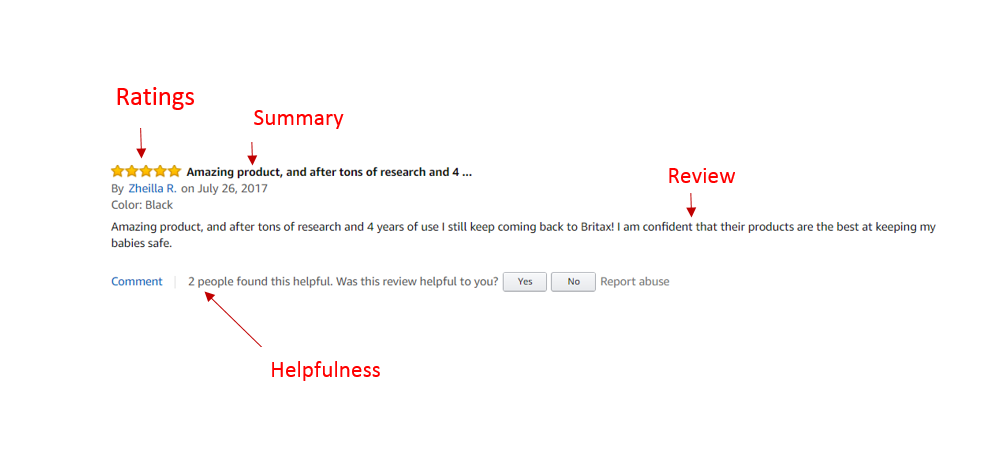

In [2]:
from IPython.display import Image
Image(filename ='C:/Amazon Rev.png')
# ![image](imagename.png "Title")

I am going to use a data of over 59,000 reviews of Amazon Baby products that is available via this link here.
http://jmcauley.ucsd.edu/data/amazon/links.html. 
This database contains 19 different features along with each of the elements of a review pictured above. So our initial goals would be to
* Perform some basic exploratory data analysis to better understand reviews.
* What are the properties of helpful reviews?
* How reviewText correlate to overall ratings.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

from wordcloud import WordCloud , STOPWORDS

from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import missingno as msno
import pandasql as pdsql
from pandasql import sqldf

import warnings
warnings.filterwarnings("ignore")


C:\Users\anands\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Reading Data

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
# import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

In [5]:
df = pd.read_csv('C:\Baby_review.csv',low_memory=False)

In [6]:
pd.read_csv('C:\Baby_review.csv',low_memory=False)

reviewerID        asin  \
0      A3NMPMELAZC8ZY  097293751X   
1      A3O4ATU0ENBKTU  097293751X   
2      A2SYNL4YX73KNY  097293751X   
3      A2Q2A6JKY95RTP  097293751X   
4      A21I33AWNOWMK8  9729375011   
5       ALRN58JO86V5E  9729375011   
6       AXEEHEUKQILR0  9729375011   
7      A3KZ91O8KA1IAZ  9729375011   
8      A1OG2X4KR2U1GE  9729375011   
9      A3EG1F4UBURE6O  9729375011   
10     A2BGDV09HCHX8E  9729375011   
11     A10STX704CY2IH  9729375011   
12     A36OZM5CENQ7LW  B00000IZQI   
13     A1Z54EM24Y40LL  B00000IZQI   
14      AZK9CCTYQNRNL  B00000IZQI   
15      API5JLBRT6FIN  B00000IZQI   
16     A1DNWA98IV5PMW  B00000IZQI   
17      AFM7DWQ762149  B00000IZQI   
18     A3DETJ3SIGHPWI  B00000IZQI   
19     A3NVSUFF2RPXOV  B00000IZQI   
20     A30H2335OM7RD6  B00000J3LL   
21     A2EP68HH1PXAN3  B00000J3LL   
22     A3NKRXQLI3FQML  B00002JV9S   
23      A9RTFYY13I0GP  B00002JV9S   
24     A3B19AL2Q4KZAG  B00002JV9S   
25     A269WG8C9O2B0C  B00002JV9S   
26     A37KH5N4TE0RPR  B00002JV9S   
27     A14RUX9GCBX49B  B00002JV9S   
28     A2QEPZKATEOCUG  B00002JV9S   
29     A3IUDIPEMB2EE8  B00002JV9S   
...               ...         ...   
56920  A383CVDQ66BP86  B00JLHWDO4   
56921  A3045OYEAMGB7Z  B00JLHWDO4   
56922  A1Y0G2WBHTXPHY  B00JLHWDO4   
56923  A3UQW8PYBBQI9P  B00JLHWDO4   
56924  A2XNKMGEYHLUK7  B00JLI73ZM   
56925  A27JH7C18JQIJB  B00JLI73ZM   
56926  A3AOVTNCJ73WZU  B00JLI73ZM   
56927  A37VACOJ7WWJR4  B00JLI73ZM   
56928  A1HKBA28E0BZF8  B00JLI73ZM   
56929  A2D3L6NXIW2BP7  B00JLI73ZM   
56930  A2RIAXGSBP65BJ  B00JRYRYS6   
56931  A2RX62V4E2BF5Z  B00JRYRYS6   
56932  A268QM4AOCO9NI  B00JRYRYS6   
56933  A2ME89MSWVG9NF  B00JRYRYS6   
56934  A3C1QYGEET3BVY  B00JRYRYS6   
56935  A3IMK08UX0I46A  B00JRYRYS6   
56936  A1ZILONLWX15N2  B00L13XFIE   
56937  A2K0QLST7946WU  B00L13XFIE   
56938  A1HH6P7G3GH9EL  B00L13XFIE   
56939  A17SL464CLQAT8  B00L13XFIE   
56940  A32IUKDAS4THJD  B00L13XFIE   
56941  A2RDQBFPIJXNOW  B00L13XFIE   
56942  A3GJJZV6K0F7IY  B00L13XFIE   
56943  A1URMXEEWEQR6V  B00L13XFIE   
56944  A2VCMK1USHIEL9  B00L13XFIE   
56945  A34T0JYVRU1M2B  B00L13XFIE   
56946  A1AFNMTDISXUJE  B00L13XFIE   
56947  A1ZS6UQ9RVUX97  B00L13XFIE   
56948   AG4E44KM93P4L  B00L13XFIE   
56949  A3CIIOMK18CHXM  B00L13XFIE   

                                        reviewerName     helpful  helpful_num  \
0                                              Jakell     [3, 3]            3   
1                                                MAPN     [1, 1]            1   
2                                 R. Davidson "Jrdpa"     [2, 2]            2   
3                                         R. Garrelts     [2, 2]            2   
4                                              EmilyS     [1, 2]            1   
5                                    John Ramahlo Jr.     [2, 3]            2   
6                                          K. Kadrmas     [2, 2]            2   
7                                    LMCR "HauteDiva"     [1, 2]            1   
8                                             M&amp;M     [1, 1]            1   
9                                       Maria M. Shaw     [6, 6]            6   
10                                       msb175 "msb"     [0, 1]            0   
11                                          Rangers68     [2, 3]            2   
12                                            Allison     [1, 1]            1   
13                                                csm   [17, 18]           17   
14                                      Deanna Hockey     [2, 2]            2   
15                                            KNSudha     [7, 7]            7   
16                           Madison and Nathan's Mom     [2, 2]            2   
17                               S. Hughes "s_hughes"  [98, 100]           98   
18                                                Sue     [7, 7]            7   
19                        William Moor "William Moor"     [1, 1]            1   
20             

In [7]:
df.shape

(56950, 19)

In [8]:
df.columns.tolist()

['reviewerID',
 'asin',
 'reviewerName ',
 'helpful',
 'helpful_num',
 'helpful_den',
 'reviewText',
 'overall',
 'summary',
 'unixReviewTime',
 'reviewTime',
 'exclamationcount',
 'questioncount',
 'charcount',
 'wordcount',
 'capcount',
 'avgrating',
 'diffrating',
 'ishelpful']

In [9]:
df.head(2)

reviewerID        asin reviewerName  helpful  helpful_num  helpful_den  \
0  A3NMPMELAZC8ZY  097293751X        Jakell  [3, 3]            3            3   
1  A3O4ATU0ENBKTU  097293751X          MAPN  [1, 1]            1            1   

                                          reviewText  overall  \
0  This book is perfect!  I'm a first time new mo...        5   
1  I use this so that our babysitter (grandma) ca...        5   

                                         summary  unixReviewTime   reviewTime  \
0                             Great for newborns      1359244800  01 27, 2013   
1  Compact and Easy way to record the milestones      1361836800  02 26, 2013   

   exclamationcount  questioncount  charcount  wordcount  capcount  avgrating  \
0                 1              0        250         46         0        4.0   
1                 0              0        734        148         0        4.0   

   diffrating  ishelpful  
0         1.0          1  
1         1.0          1

In [10]:
df.sort_values(by='overall', ascending=False)[:3]

reviewerID        asin    reviewerName    helpful  helpful_num  \
0      A3NMPMELAZC8ZY  097293751X           Jakell    [3, 3]            3   
31934  A37QWKCN6XQV1I  B003FLLQX6           K Bosh    [1, 1]            1   
31939  A1ER8RH6UFTD1W  B003FLLQXG  Melanie Cintron  [10, 11]           10   

       helpful_den                                         reviewText  \
0                3  This book is perfect!  I'm a first time new mo...   
31934            1  Babies like faces, bright colors, and rattles....   
31939           11  This rattle is great! The shape of it makes it...   

       overall                            summary  unixReviewTime  \
0            5                 Great for newborns      1359244800   
31934        5  Fun, Perky, Baby's First Favorite      1301961600   
31939        5             Easy to grip for baby.      1287446400   

        reviewTime  exclamationcount  questioncount  charcount  wordcount  \
0      01 27, 2013                 1              0        250         46   
31934   04 5, 2011                 1              2        729        137   
31939  10 19, 2010                 1              0        269         56   

       capcount  avgrating  diffrating  ishelpful  
0             0   4.000000    1.000000          1  
31934         1   5.000000    0.000000          1  
31939         0   3.777778    1.222222          1

In [11]:
df.describe()

helpful_num   helpful_den       overall  unixReviewTime  \
count  56950.000000  56950.000000  56950.000000    5.695000e+04   
mean       4.939701      5.987199      3.951975    1.329489e+09   
std       23.655852     24.799907      1.308374    7.046482e+07   
min        0.000000      1.000000      1.000000    9.824544e+08   
25%        1.000000      1.000000      3.000000    1.306454e+09   
50%        1.000000      2.000000      4.000000    1.353802e+09   
75%        3.000000      4.000000      5.000000    1.376006e+09   
max     1206.000000   1214.000000      5.000000    1.405987e+09   

       exclamationcount  questioncount     charcount     wordcount  \
count      56950.000000   56950.000000  56950.000000  56950.000000   
mean           0.879385       0.102476    724.742423    137.282476   
std            1.814582       0.493295    767.795333    142.234619   
min            0.000000       0.000000     11.000000      1.000000   
25%            0.000000       0.000000    282.000000     54.000000   
50%            0.000000       0.000000    498.000000     96.000000   
75%            1.000000       0.000000    876.000000    167.000000   
max           74.000000      18.000000  21655.000000   3855.000000   

           capcount     avgrating    diffrating     ishelpful  
count  56950.000000  56950.000000  56950.000000  56950.000000  
mean       0.616014      3.952153      0.924875      0.678244  
std        3.110724      0.595734      0.708137      0.467154  
min        0.000000      1.000000      0.000000      0.000000  
25%        0.000000      3.636364      0.400000      0.000000  
50%        0.000000      4.000000      0.769231      1.000000  
75%        0.000000      4.352941      1.272727      1.000000  
max      183.000000      5.000000      3.821429      1.000000

## Exploratory Data Analysis

### I. Distribution of overall ratings

In [12]:
df['overall'].value_counts()

5    28368
4    11717
3     7463
1     4836
2     4566
Name: overall, dtype: int64

In [13]:
df1 = df.groupby(['overall']).agg({'reviewerID': 'count'})
df1['% of total']= df1['reviewerID']/df1['reviewerID'].sum()*100
# df1['% of total'] = df1['% of total'].map('{:,.2f}%'.format)
df1

reviewerID  % of total
overall                        
1              4836    8.491659
2              4566    8.017559
3              7463   13.104478
4             11717   20.574188
5             28368   49.812116

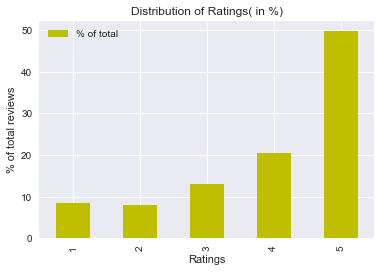

In [14]:
df1.reset_index(level = 0 , inplace = True)
df1
s = df1[['overall','% of total']]
s.set_index('overall', inplace = True)
s.plot(kind = 'bar', color = 'y')
plt.xlabel("Ratings")
plt.ylabel("% of total reviews")
plt.title("Distribution of Ratings( in %)")


Looking at the distribution of ratings, we see that 5-star reviews constitute a large proportion (50%) of all reviews. The next most prevalent rating is 4-stars(21%), followed by 3-star (13%), 1-star (8.5%), and finally 2-star reviews (8.0%).

### II. Ratings and their helpfulness

* Reviews are voted upon based on how helpful other reviewers find them. The most helpful reviews appear near the top of the list of reviews and are hence more visible. As such, I was interested in exploring the properties of helpful reviews.

In [15]:
t2 = pd.crosstab(df['overall'], df['ishelpful'],margins = True)
t2.columns = ["Not-helpful","Helpful",'Total']
t2.index = [1,2,3,4,5,'Total']
t2 = t2/t2.ix["Total","Total"]*100
t2['Total'] = t2['Total'].map('{:,.2f}%'.format)
t2['Not-helpful'] = t2['Not-helpful'].map('{:,.2f}%'.format)
t2['Helpful'] = t2['Helpful'].map('{:,.2f}%'.format)
t2

Not-helpful Helpful    Total
1           4.18%   4.31%    8.49%
2           3.62%   4.40%    8.02%
3           5.17%   7.94%   13.10%
4           6.02%  14.56%   20.57%
5          13.19%  36.62%   49.81%
Total      32.18%  67.82%  100.00%

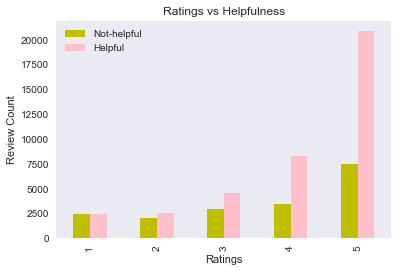

In [16]:
t2 = pd.crosstab(df['overall'], df['ishelpful'])
t2.columns = ["Not-helpful","Helpful"]
t2.index = [1,2,3,4,5]
t2.plot(kind='bar', stacked=False, color=['y','pink'], grid=False)
plt.xlabel("Ratings")
plt.ylabel("Review Count")
plt.title("Ratings vs Helpfulness")

We looked at the percentage of those reviews that users found helpful or not helpful for each Star rating. And we notice that as the ratings increase, the reviews become more helpful. For 5-star reviews, 36% reviews were found helpful and 13% not helpful.

### III. Avg word_cnt per review

It will be interesting to see what are the word counts for a given review. Further, I would also like to explore the correlation  between word count and other characteristics of a given review like helpfulness.

#### Word cnt wrt Rating(overall)

In [17]:
pysql = lambda q: pdsql.sqldf(q, globals())
str1= """SELECT overall as Ratings,avg(wordcount), min(wordcount), max(wordcount)
from df
group by overall
"""
p1 = pysql(str1)
p1.head(10)
p1
# p1.plot(kind = 'box')

Ratings  avg(wordcount)  min(wordcount)  max(wordcount)
0        1      117.148677               2            2978
1        2      132.210031              12            1262
2        3      144.172451               4            3855
3        4      159.316293               2            2232
4        5      130.617844               1            2352

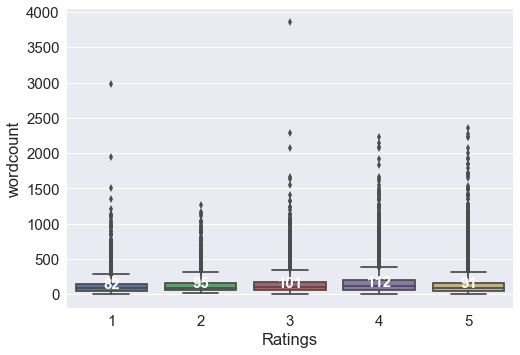

In [18]:
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 3})

pysql = lambda q: pdsql.sqldf(q, globals())
str1= """SELECT overall as Ratings, wordcount
from df
"""
p2 = pysql(str1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
ax = sns.boxplot( p2.Ratings,p2.wordcount, palette = 'deep', color = color)
medians = p2.groupby(['Ratings'])['wordcount'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.25, median_labels[tick], 
            horizontalalignment='center', size='small', color='w', weight='bold')
    


5-star reviews have the second lowest median word count (91 words), while 3-star reviews have relatively higher median word count (101 words).

### IV. Avg word_cnt per review on helpfulness index

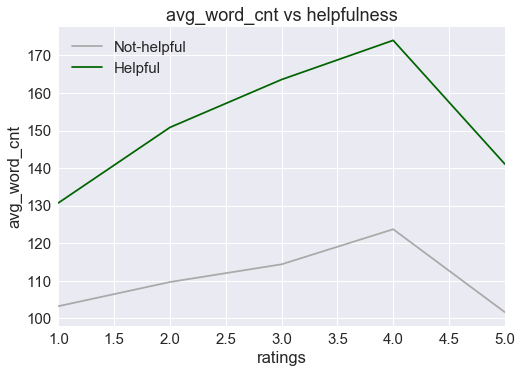

In [19]:
pysql = lambda q: pdsql.sqldf(q, globals())

str1= """SELECT overall, Avg(wordcount) as avg_wordcount
from df
where ishelpful = 0
group by overall, ishelpful
"""
df1 = pysql(str1)
# df1.head(10)
# ax = df1.plot(x='overall', y='avg_wordcount',  color='g')

str2= """SELECT overall, Avg(wordcount) as avg_wordcount
from df
where ishelpful = 1
group by overall, ishelpful
"""
df1 = pysql(str1)
df2 = pysql(str2)
ax = df1.plot(x='overall', y='avg_wordcount', color='Darkgrey', label = 'Not-helpful')
df2.plot(x='overall', y='avg_wordcount', color='Darkgreen', label = 'Helpful', ax = ax)
plt.ylabel('avg_word_cnt')
plt.xlabel('ratings')
plt.title("avg_word_cnt vs helpfulness")


The word counts for helpful reviews and not helpful reviews have a similar distribution.  However, not helpful reviews have a larger concentration of reviews with low word count and helpful reviews have more longer reviews. Descriptive reviews are helpful in general.

### V. Regular vs Non Regular Reviewers 

We are interested to draw a comparision between the reviews of regular vs not regular reviewers. So who are regular reviewers? Our obvious choice would be those customers who have clearly reviewed more than once. the more the better! After analysing the review counts, we found out that there is a good distinction of review counts between <3 reviews and more than 3 reviews /customer in the dataset. So, we assigned reviewers as frequent reviewers who have more than 3 reviews and vice-versa. The goal here is to identify if there is any behavioral distinction between frequent and not frequent reviewer groups.

In [20]:
pysql = lambda q: pdsql.sqldf(q, globals())

str1= """SELECT reviewerID, count(overall) as frequency
from df
group by reviewerID
"""
df4 = pysql(str1)
df4['% of total review']= df4['frequency']/df4['frequency'].sum()*100
df4['% of total review'] = df4['% of total review'].map('{:,.2f}%'.format)
df4["frequency"].value_counts()

2     4143
1     4047
3     3267
4     2154
5     1395
6      739
7      431
8      251
9      178
10     135
11      90
12      71
13      57
14      31
17      29
15      28
16      25
18      14
20      12
19      11
21       8
22       8
32       6
26       6
23       5
24       4
27       3
36       2
25       2
38       2
31       1
49       1
48       1
30       1
45       1
33       1
58       1
44       1
34       1
35       1
57       1
37       1
53       1
47       1
Name: frequency, dtype: int64

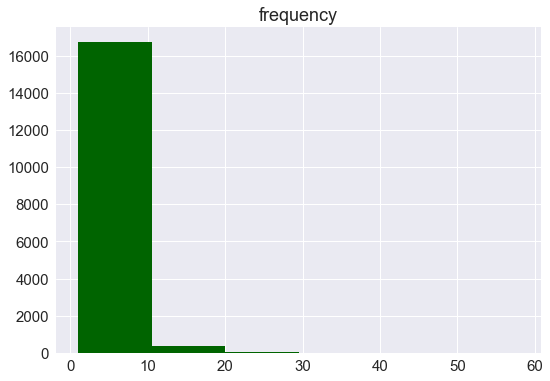

In [21]:
df4.hist(layout=(1,2),bins = 6, figsize = [20,6], color = 'Darkgreen') 
plt.xlabel("Number of reviewers")
plt.ylabel('Reviewer_cnt')

Here Frequency is the number of reviews completed by a given customer on the website. From the above histogram we see we have quite a good concentration of reviewers in the dataset reviewing in the range of 1-10 times. After analysing further we found below.
* We have 8977 Regular Customers with Review frequency > 2
* We have 8190 customers which are not so regular having frequency <= 2
* Majority of the reviews(7410) are done by customers who have reviewed atleast 2 or 3 times.

### Do "more reviews" mean they are "more helpful"  ? 
#### OR
### Do "frequent reviewers" write "helpful reviews"?

In [22]:
str1="""Select reviewerID, count(overall) as Frequency, overall as Stars, ishelpful as Helpful
from df
group by reviewerID, overall
"""
df5 = pysql(str1)
# df5['% of total review']= df5['frequency']/df4['frequency'].sum()*100
# df5['% of total review'] = df5['% of total review'].map('{:,.2f}%'.format)
# df5['reg_nonreg']=df5['frequency'].apply(lambda x: "Non-Regular" if x < 3 else "Regular")

df5['TotalFrequency']= df5.groupby('reviewerID').Frequency.transform(np.sum)
s = df5[['Helpful','TotalFrequency']]
s
t1 = pd.crosstab(s['TotalFrequency'], s['Helpful'])
t1.columns = ['Not-Helpful', 'Helpful']
t1
# t1.plot(color = ['orange','green','grey'])
# plt.xlabel("No of times user reviewed")
# plt.ylabel("Total Reviews")
# plt.title("Review frequency vs Helpfulness")

Not-Helpful  Helpful
TotalFrequency                      
1                      1557     2490
2                      2579     4082
3                      2415     4303
4                      1752     3387
5                      1206     2583
6                       704     1472
7                       450      884
8                       258      562
9                       199      399
10                      171      312
11                       95      230
12                       79      174
13                       71      132
14                       41       78
15                       40       69
16                       38       61
17                       36       77
18                       24       31
19                       13       29
20                       19       28
21                        9       24
22                        7       23
23                        5       17
24                        5       12
25                        1        7
26                        7       16
27                        2       11
30                        0        3
31                        2        2
32                        7       19
33                        2        3
34                        1        3
35                        0        5
36                        4        6
37                        0        5
38                        0        9
44                        0        4
45                        2        3
47                        1        3
48                        1        3
49                        2        3
53                        2        2
57                        3        2
58                        5        0

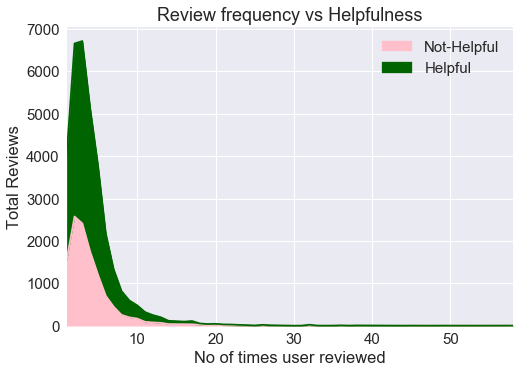

In [23]:
t1.plot.area(color = ['pink','Darkgreen'])
plt.xlabel("No of times user reviewed")
plt.ylabel("Total Reviews")
plt.title("Review frequency vs Helpfulness")

There is no striking pattern detected from the above plot generated for Total Frequecy of the reviews vs Helpfulness. However, we clearly see more helpful reviews for each frequency. Also, we notice more helpful reviews than not -useful ones for the users who have reviewed for about 2-8 times as opposed to higher frequency holders. Also, as the review frequency increases that is the number of times user gives review increases, so does the helpful index in general. So we can say more reviews are better!  

### Inferences

* In general positive reviews are common in this dataset.
* We have 50 % of the total reviews assigned as 5 -star.
* Best reviews (5-star) are relatively shorter.
* Longer reviews are more helpful.
* Frequent reviewers write longer and helpful reviews.


### Preprocessing data

Steps involved.
* Identifying nulls
* Word Normalization
  1. converting to lowercase.
  2. removing punctualtion.
  3. removing stopwords.   
* Tokenization

In [24]:
df.head(1)
dfr = df[['reviewerID', 'reviewText','overall','summary']]
dfr.head(3)

reviewerID                                         reviewText  overall  \
0  A3NMPMELAZC8ZY  This book is perfect!  I'm a first time new mo...        5   
1  A3O4ATU0ENBKTU  I use this so that our babysitter (grandma) ca...        5   
2  A2SYNL4YX73KNY  I like this log, but think it would work bette...        3   

                                         summary  
0                             Great for newborns  
1  Compact and Easy way to record the milestones  
2                          Needs clearer AM & PM

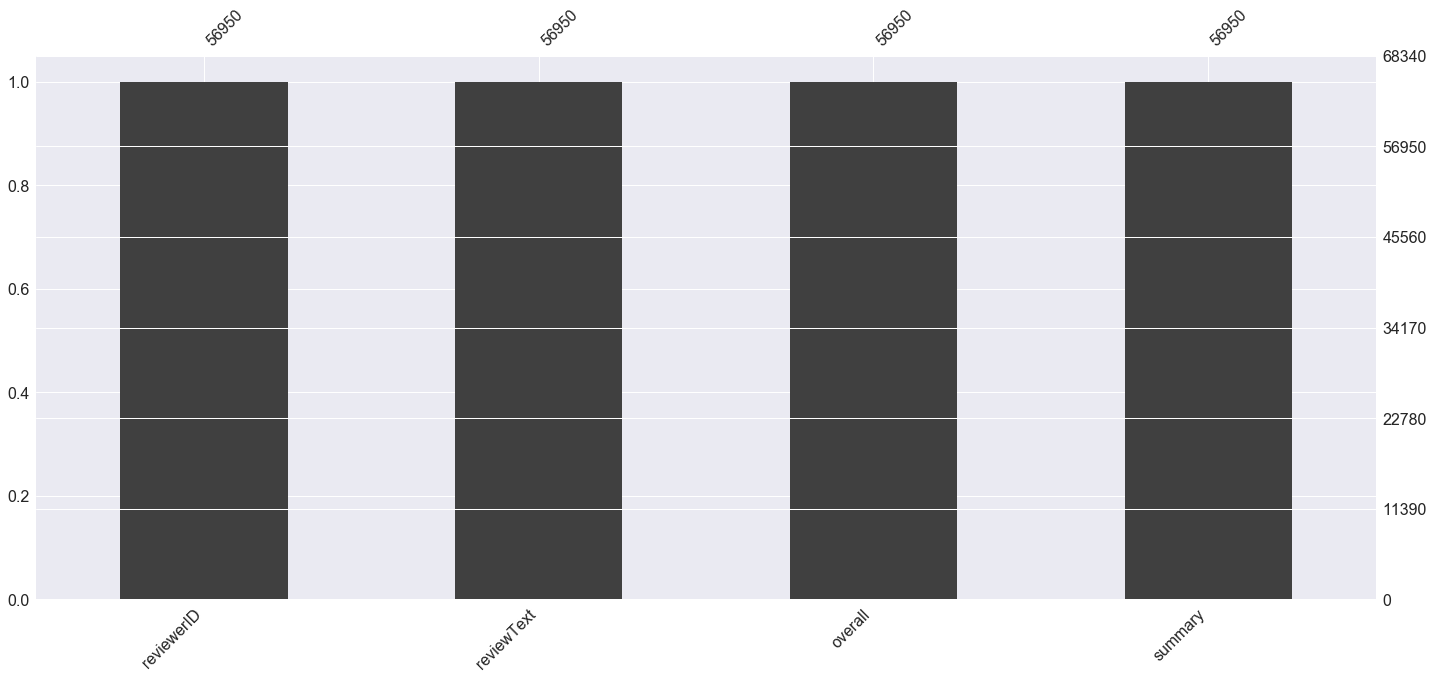

In [25]:
msno.bar(dfr)#columns with missing values

In [26]:
#Converting review text to lower case
pd.options.mode.chained_assignment = None  # default='warn'
dfr['reviewText'] = dfr['reviewText'].str.lower()
dfr.head(2)

reviewerID                                         reviewText  overall  \
0  A3NMPMELAZC8ZY  this book is perfect!  i'm a first time new mo...        5   
1  A3O4ATU0ENBKTU  i use this so that our babysitter (grandma) ca...        5   

                                         summary  
0                             Great for newborns  
1  Compact and Easy way to record the milestones

In [27]:
# Removing puctuations
def remove_punctuations(text):
    for p in punctuation:
        text = text.replace(p, ' ')
    return text
dfr['reviewText'] = dfr['reviewText'].apply(remove_punctuations)
dfr.head(3)

reviewerID                                         reviewText  overall  \
0  A3NMPMELAZC8ZY  this book is perfect   i m a first time new mo...        5   
1  A3O4ATU0ENBKTU  i use this so that our babysitter  grandma  ca...        5   
2  A2SYNL4YX73KNY  i like this log  but think it would work bette...        3   

                                         summary  
0                             Great for newborns  
1  Compact and Easy way to record the milestones  
2                          Needs clearer AM & PM

In [28]:
# import string 
# import re
# import nltk

# txt_re= re.compile('[^a-z]+')
# def txt_cleanup(txt):
#     txt = txt_re.sub(' ', txt).strip()
#     return txt

# df["txt_clean"] = df["reviewText"].apply(txt_cleanup)

In [29]:
# remove stopwords
pd.options.mode.chained_assignment = None  # default='warn'
from nltk.corpus import stopwords
stop = stopwords.words('english')
dfr['reviewText'] = dfr['reviewText'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
dfr.head(3)

reviewerID                                         reviewText  overall  \
0  A3NMPMELAZC8ZY  book perfect first time new mom book made easy...        5   
1  A3O4ATU0ENBKTU  use babysitter grandma keep track goes day rec...        5   
2  A2SYNL4YX73KNY  like log think would work better clearer pm se...        3   

                                         summary  
0                             Great for newborns  
1  Compact and Easy way to record the milestones  
2                          Needs clearer AM & PM

In [30]:
# creating a tokenized column for the reviewText
dfr['reviewText_token'] = dfr['reviewText'].apply(word_tokenize)
dfr.head(2)

reviewerID                                         reviewText  overall  \
0  A3NMPMELAZC8ZY  book perfect first time new mom book made easy...        5   
1  A3O4ATU0ENBKTU  use babysitter grandma keep track goes day rec...        5   

                                         summary  \
0                             Great for newborns   
1  Compact and Easy way to record the milestones   

                                    reviewText_token  
0  [book, perfect, first, time, new, mom, book, m...  
1  [use, babysitter, grandma, keep, track, goes, ...

In [31]:
# Creating tokenized text
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

dfr.reviewText.head(3).apply(split_into_lemmas)


0    [book, perfect, first, time, new, mom, book, m...
1    [use, babysitter, grandma, keep, track, go, da...
2    [like, log, think, would, work, better, cleare...
Name: reviewText, dtype: object

In [32]:
# Add Sentimemnt field
dfr['sentiment'] = dfr.overall.apply(lambda overall: "positive" if overall > 3 else "negative" if overall < 3 else "neutral")
dfr.tail(1)

reviewerID                                         reviewText  \
56949  A3CIIOMK18CHXM  great bought hemp inserts beginning stink like...   

       overall           summary  \
56949        5  Really absorbent   

                                        reviewText_token sentiment  
56949  [great, bought, hemp, inserts, beginning, stin...  positive

In [33]:
dfr.sentiment.value_counts()

positive    40085
negative     9402
neutral      7463
Name: sentiment, dtype: int64

In [34]:
dfr = dfr[dfr.sentiment != 'neutral']

In [35]:
dfr.groupby('sentiment').describe()

overall
sentiment                    
negative  count   9402.000000
          mean       1.485641
          std        0.499820
          min        1.000000
          25%        1.000000
          50%        1.000000
          75%        2.000000
          max        2.000000
positive  count  40085.000000
          mean       4.707696
          std        0.454827
          min        4.000000
          25%        4.000000
          50%        5.000000
          75%        5.000000
          max        5.000000

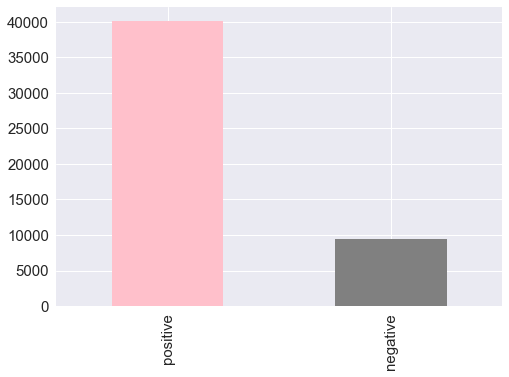

In [36]:
dfr['sentiment'].value_counts().plot(kind='bar', color=['pink','grey'])

In [37]:
pos_sent = dfr[dfr.sentiment == "positive"]
neg_sent = dfr[dfr.sentiment == "negative"]

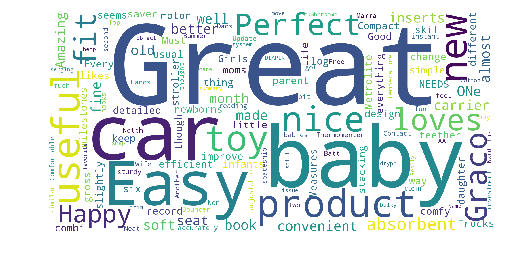

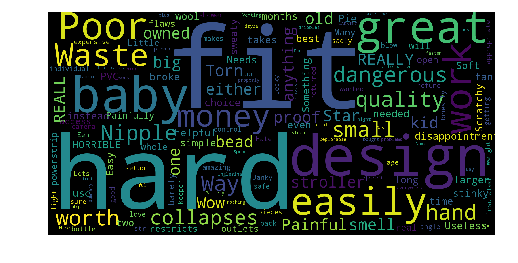

In [38]:
# Create WordCloud
# from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Positive WordCloud
pos_wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500,
                          max_font_size=100, scale=5, random_state=1).generate(str(pos_sent.summary))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

# Negative WordCloud
neg_wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=500,
                          max_font_size=100, scale=5, random_state=1).generate(str(neg_sent.summary))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

### Data to Vectors 

#### Bag of words

In [39]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(dfr['reviewText'])
print (len(bow_transformer.vocabulary_))

39944


In [40]:
reviewTextSample = dfr['reviewText'][0]
print(reviewTextSample)


book perfect first time new mom book made easy keep track feedings diaper changes sleep definitely would recommend new moms plus small enough throw diaper back doctor visits


In [41]:
bow_sample = bow_transformer.transform([reviewTextSample])
print (bow_sample)
print (bow_sample.shape)

  (0, 4267)	1
  (0, 5686)	2
  (0, 7306)	1
  (0, 10503)	1
  (0, 10989)	2
  (0, 11687)	1
  (0, 12383)	1
  (0, 12930)	1
  (0, 14090)	1
  (0, 14327)	1
  (0, 19561)	1
  (0, 21224)	1
  (0, 22496)	2
  (0, 23366)	2
  (0, 25657)	1
  (0, 26374)	1
  (0, 28459)	1
  (0, 31649)	1
  (0, 31839)	1
  (0, 35544)	1
  (0, 35657)	1
  (0, 36171)	1
  (0, 38222)	1
  (0, 39504)	1
(1, 39944)


In [42]:
# Sanity Check: Testing which words have been repeated twice
print (bow_transformer.get_feature_names()[22496])
print (bow_transformer.get_feature_names()[5686])

mom
book


In [43]:
# to transform the entire bag-of-words corpus into TF-IDF corpus at once:
reviewText_bow = bow_transformer.transform(dfr['reviewText'])

In [44]:
#And finally, after the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(reviewText_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print (tfidf_sample)

  (0, 39504)	0.0910911774391
  (0, 38222)	0.248638550566
  (0, 36171)	0.269602705872
  (0, 35657)	0.0974133883326
  (0, 35544)	0.19470588015
  (0, 31839)	0.130941923183
  (0, 31649)	0.152305109642
  (0, 28459)	0.126209499967
  (0, 26374)	0.172009264279
  (0, 25657)	0.13783427868
  (0, 23366)	0.291703927434
  (0, 22496)	0.345382649914
  (0, 21224)	0.132073383481
  (0, 19561)	0.122474735529
  (0, 14327)	0.115279646197
  (0, 14090)	0.185310962094
  (0, 12930)	0.12686373717
  (0, 12383)	0.102774647355
  (0, 11687)	0.262560998447
  (0, 10989)	0.262810764604
  (0, 10503)	0.154025172667
  (0, 7306)	0.167351307043
  (0, 5686)	0.436619225984
  (0, 4267)	0.11599239369


In [45]:
#What is the IDF (inverse document frequency) of the word "b"? Of word "book"?
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['p']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['perfect']])

6.72808112994
3.31372025092


In [46]:
tfidf_transformer = TfidfTransformer().fit(reviewText_bow)
reviewText_tfidf = tfidf_transformer.transform(reviewText_bow)
print (reviewText_tfidf.shape)

(49487, 39944)


### Vocabulary!

In [47]:
print ("Now that our Bag of data model is trained, lets take a peek at the vocabulary. Our vocabulary comprises of 15000 words:-\n\n")
# X_train_CV = CV.transform(X_train)
vocab = bow_transformer.get_feature_names()
print(vocab[-200:])

Now that our Bag of data model is trained, lets take a peek at the vocabulary. Our vocabulary comprises of 15000 words:-


['yeswhy', 'yet', 'yeti', 'yetplenty', 'yeuch', 'yey', 'yezz', 'yield', 'yielded', 'yielding', 'yikes', 'yin', 'yippee', 'yippeee', 'ykk', 'ym', 'ymca', 'yo', 'yoga', 'yoghurt', 'yogurt', 'yoke', 'yolk', 'yoo', 'yoplait', 'yore', 'york', 'yorker', 'yorkers', 'yoru', 'yosemite', 'you2', 'you9', 'youcons', 'youd', 'youfamily', 'youg', 'youger', 'yough', 'youhave', 'youll', 'youmotorola', 'younever', 'young', 'younger', 'youngest', 'youngests', 'youngin', 'younging', 'youngins', 'youngster', 'yourchest', 'youre', 'yourgo', 'yourself3', 'yourself5', 'yourslansinoh', 'yoursprosdouble', 'yousoft', 'youth', 'youthful', 'youto', 'youtube', 'youtubes', 'youve', 'yowch', 'yowza', 'yoyo', 'yr', 'yrmv', 'yrold', 'ysr', 'yuan', 'yuck', 'yucki', 'yuckie', 'yuckiness', 'yucky', 'yuk', 'yukon', 'yuky', 'yum', 'yummi', 'yummy', 'yup', 'yuppie', 'yuppiest', 'ywo', 'z', 'zac', 'zach'

### Time for some Machine Learning

#### At this point, we have numeric training features from the Bag of Words and the original sentiment labels for each feature vector, so let's do some supervised learning!

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = dfr['reviewText']
y = dfr['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state=1)
print('Size of training set: ', len(X_train))
print('Size of test set: ', len(X_test))


Size of training set:  34640
Size of test set:  14847


In [49]:
# # Initialize the "CountVectorizer" object, which is scikit-learn's # bag of words tool.
CV = CountVectorizer( max_features = 15000)

# fit _transform does 2 jobs: ##it fits the model and learns the vocabulary.##it transforms our training data into feature vectors.
# The input to fit_transform should be a list of strings.
X_train_CV = CV.fit_transform(X_train)
# print( "number words in training corpus:", len(CV.get_feature_names()))

X_test_CV = CV.transform(X_test)

X_train_CV = X_train_CV.toarray()
X_train_CV.shape

(34640, 15000)

In [50]:
# calculate accuracy, precision, recall, and F-measure of class predictions
from sklearn import metrics 
def eval_metrics(y_test, y_pred):
    print ('accuracy: '+ str(metrics.accuracy_score(y_test, y_pred)))
    print ('precision:'+ str(metrics.precision_score(y_test, y_pred, average='weighted')))
    print ('recall:'+ str(metrics.recall_score(y_test, y_pred, average='weighted')))
    print ('F-measure:'+ str(metrics.f1_score(y_test, y_pred, average='weighted')))


In [51]:
# function for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def xval_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

### Naive Bayes with counter-vectorization

In [52]:
# Applying Multinomial Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
multiNB = modelNB.fit(X_train_CV, y_train)
multiNB_pred = multiNB.predict(X_test_CV)
eval_metrics(y_test,multiNB_pred)

accuracy: 0.862531151074
precision:0.866173053853
recall:0.862531151074
F-measure:0.864182986426


In [53]:
sent_detector = MultinomialNB().fit(reviewText_tfidf, dfr['sentiment'])
print ('predicted:', sent_detector.predict(tfidf_sample)[0])
print ('expected:', dfr.sentiment[225])
dfr.sentiment[:205]

# modelNB.fit(tfidf_sample[9])

predicted: positive
expected: negative


0      positive
1      positive
4      positive
5      positive
6      positive
7      positive
8      positive
9      positive
10     positive
11     positive
12     positive
13     positive
14     positive
15     positive
16     positive
17     positive
18     positive
19     positive
21     positive
22     positive
24     positive
25     positive
26     positive
28     positive
29     negative
30     negative
32     negative
33     positive
36     positive
37     positive
         ...   
201    positive
202    negative
203    positive
204    positive
205    negative
206    positive
207    positive
209    negative
210    positive
211    positive
212    negative
214    positive
215    positive
216    negative
217    positive
218    negative
219    positive
220    positive
223    positive
225    negative
226    negative
227    positive
229    negative
230    negative
231    positive
232    positive
233    positive
234    negative
235    positive
236    negative
Name: sentiment, dtype: 

In [54]:
# clf = MultinomialNB()
# NBscore = xval_score(clf, X_test_CV, y_test)
# print(NBscore)

In [55]:
# Applying Bernoulli Naïve Bayes 
from sklearn.naive_bayes import BernoulliNB
modelNB = BernoulliNB()
berNB = modelNB.fit(X_train_CV, y_train)
berNB_pred= berNB.predict(X_test_CV)
eval_metrics(y_test, berNB_pred)

# nb = MultinomialNB()
# %time nb.fit(X_train_CV, y_train)

accuracy: 0.845355964168
precision:0.870007893372
recall:0.845355964168
F-measure:0.853551717769


### Naive Bayes with TF-IDF

In [56]:
tf = TfidfVectorizer(min_df=5, max_df=0.8)
tf_train = tf.fit_transform(X_train)
tf_test = tf.transform(X_test)

In [57]:
from sklearn.naive_bayes import MultinomialNB
modelNBTF = MultinomialNB()
multiNBTF = modelNBTF.fit(tf_train, y_train)
multiNBTF_pred = multiNBTF.predict(tf_test)
eval_metrics(y_test,multiNBTF_pred)

accuracy: 0.82636222806
precision:0.842054942509
recall:0.82636222806
F-measure:0.763905001941


In [58]:
cv = CountVectorizer(min_df = 1, ngram_range = (1, 2))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [59]:
model = MultinomialNB()
multi_cv = model.fit(X_train_cv, y_train)
multi_pred = multi_cv.predict(X_test_cv)
eval_metrics(y_test,multi_pred)

accuracy: 0.821175995151
precision:0.848199601946
recall:0.821175995151
F-measure:0.750963692676


### Support Vector Machine

In [60]:
# instantiate and train model, kernel=linear
model = svm.SVC(kernel='linear', random_state=44)
svm = model.fit(tf_train, y_train)
svm_pred = svm.predict(tf_test)
eval_metrics(y_test,svm_pred)

accuracy: 0.904021014346
precision:0.899766973931
recall:0.904021014346
F-measure:0.899108048718


### Logistic Regression

In [61]:
modellr = LogisticRegression(C=1e5)
lr = modellr.fit(tf_train, y_train)
lr_pred = lr.predict(tf_test)
eval_metrics(y_test, lr_pred)

accuracy: 0.850205428706
precision:0.854196964075
recall:0.850205428706
F-measure:0.852033238903


### Classifier Comparision 

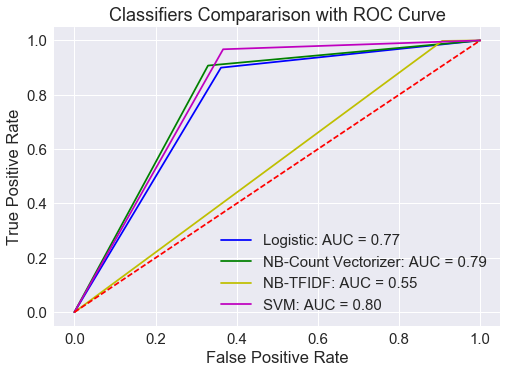

In [62]:
from sklearn.metrics import roc_curve, auc
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

prediction = dict()
prediction['Logistic'] = lr.predict(tf_test)
prediction['NB-Count Vectorizer']= multiNB.predict(X_test_CV)
prediction['NB-TFIDF']= multiNBTF.predict(tf_test)
prediction['SVM']= svm.predict(tf_test)

for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC = %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers Compararison with ROC Curve')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

### Classification Report

In [63]:
print ('Accuracy Score = ',metrics.accuracy_score(y_test,predicted).round(4)*100,"%")

labels = list(set(dfr.sentiment))
print(metrics.classification_report(y_test, predicted, target_names=labels))

Accuracy Score =  90.4 %
             precision    recall  f1-score   support

   negative       0.82      0.63      0.71      2818
   positive       0.92      0.97      0.94     12029

avg / total       0.90      0.90      0.90     14847



### Conclusion 

##### With the information we gathered by analyzing the characteristics features of reviews, we see there is a lot of value hidden in the text of the reviews.  Amazon can come up with a marketing strategy to encourage users to leave longer reviews as they tend to be more useful in prompting purchasing decisions. Our machine learning model shows that it is possible to predict the rating level of a review with great accuracy just by analyzing the text. 

#### References

* https://www.invespcro.com/blog/the-importance-of-online-customer-reviews-infographic/
* http://ataspinar.com/2015/11/16/text-classification-and-sentiment-analysis/
* http://fastml.com/classifying-text-with-bag-of-words-a-tutorial/
* https://www.youtube.com/watch?v=c3fnHA6yLeY&list=PL6397E4B26D00A269&index=24